In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sanjiv\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load data
csv_file = r'C:\Users\sanjiv\Documents\Datasets\Kaggle\Flotation\MiningProcess_Flotation_Plant_Database.csv'
master = pd.read_csv(csv_file, decimal=',', parse_dates=['date'], index_col='date')
#master = pd.read_csv(csv_file, decimal=',')


In [4]:
master.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


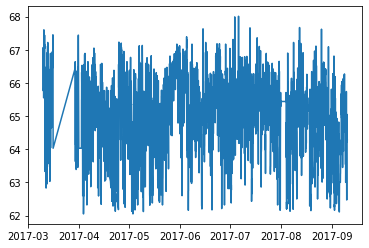

In [5]:
plt.plot(master["% Iron Concentrate"])

(array([ 1080.,  2700., 39462., 66887., 68868., 55916., 62748., 50538.,
        41633., 54097., 30769., 25549., 23575., 18572., 16289., 24362.,
        15736., 13805., 17170., 14363., 11596., 14060.,  9532.,  9206.,
         9740., 11701., 12516.,  5597.,  4634.,  4752.]),
 array([0.6       , 0.76433333, 0.92866667, 1.093     , 1.25733333,
        1.42166667, 1.586     , 1.75033333, 1.91466667, 2.079     ,
        2.24333333, 2.40766667, 2.572     , 2.73633333, 2.90066667,
        3.065     , 3.22933333, 3.39366667, 3.558     , 3.72233333,
        3.88666667, 4.051     , 4.21533333, 4.37966667, 4.544     ,
        4.70833333, 4.87266667, 5.037     , 5.20133333, 5.36566667,
        5.53      ]),
 <a list of 30 Patch objects>)

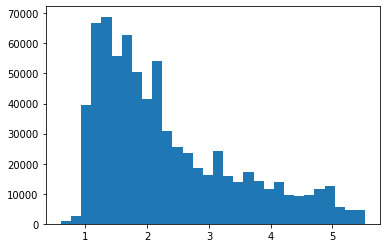

In [8]:
plt.hist(master["% Silica Concentrate"], bins=30)